In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/IncidentiModificato.xlsx')
df.DATA = df.DATA.apply(lambda d: (d - dt.datetime(1970,1,1)).days)

X = df[['DATA','SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI', 'Tot Testa', 'Tot Torace', 'Tot Addome', 'Tot Scheletro']]
y = df['Mezzo']

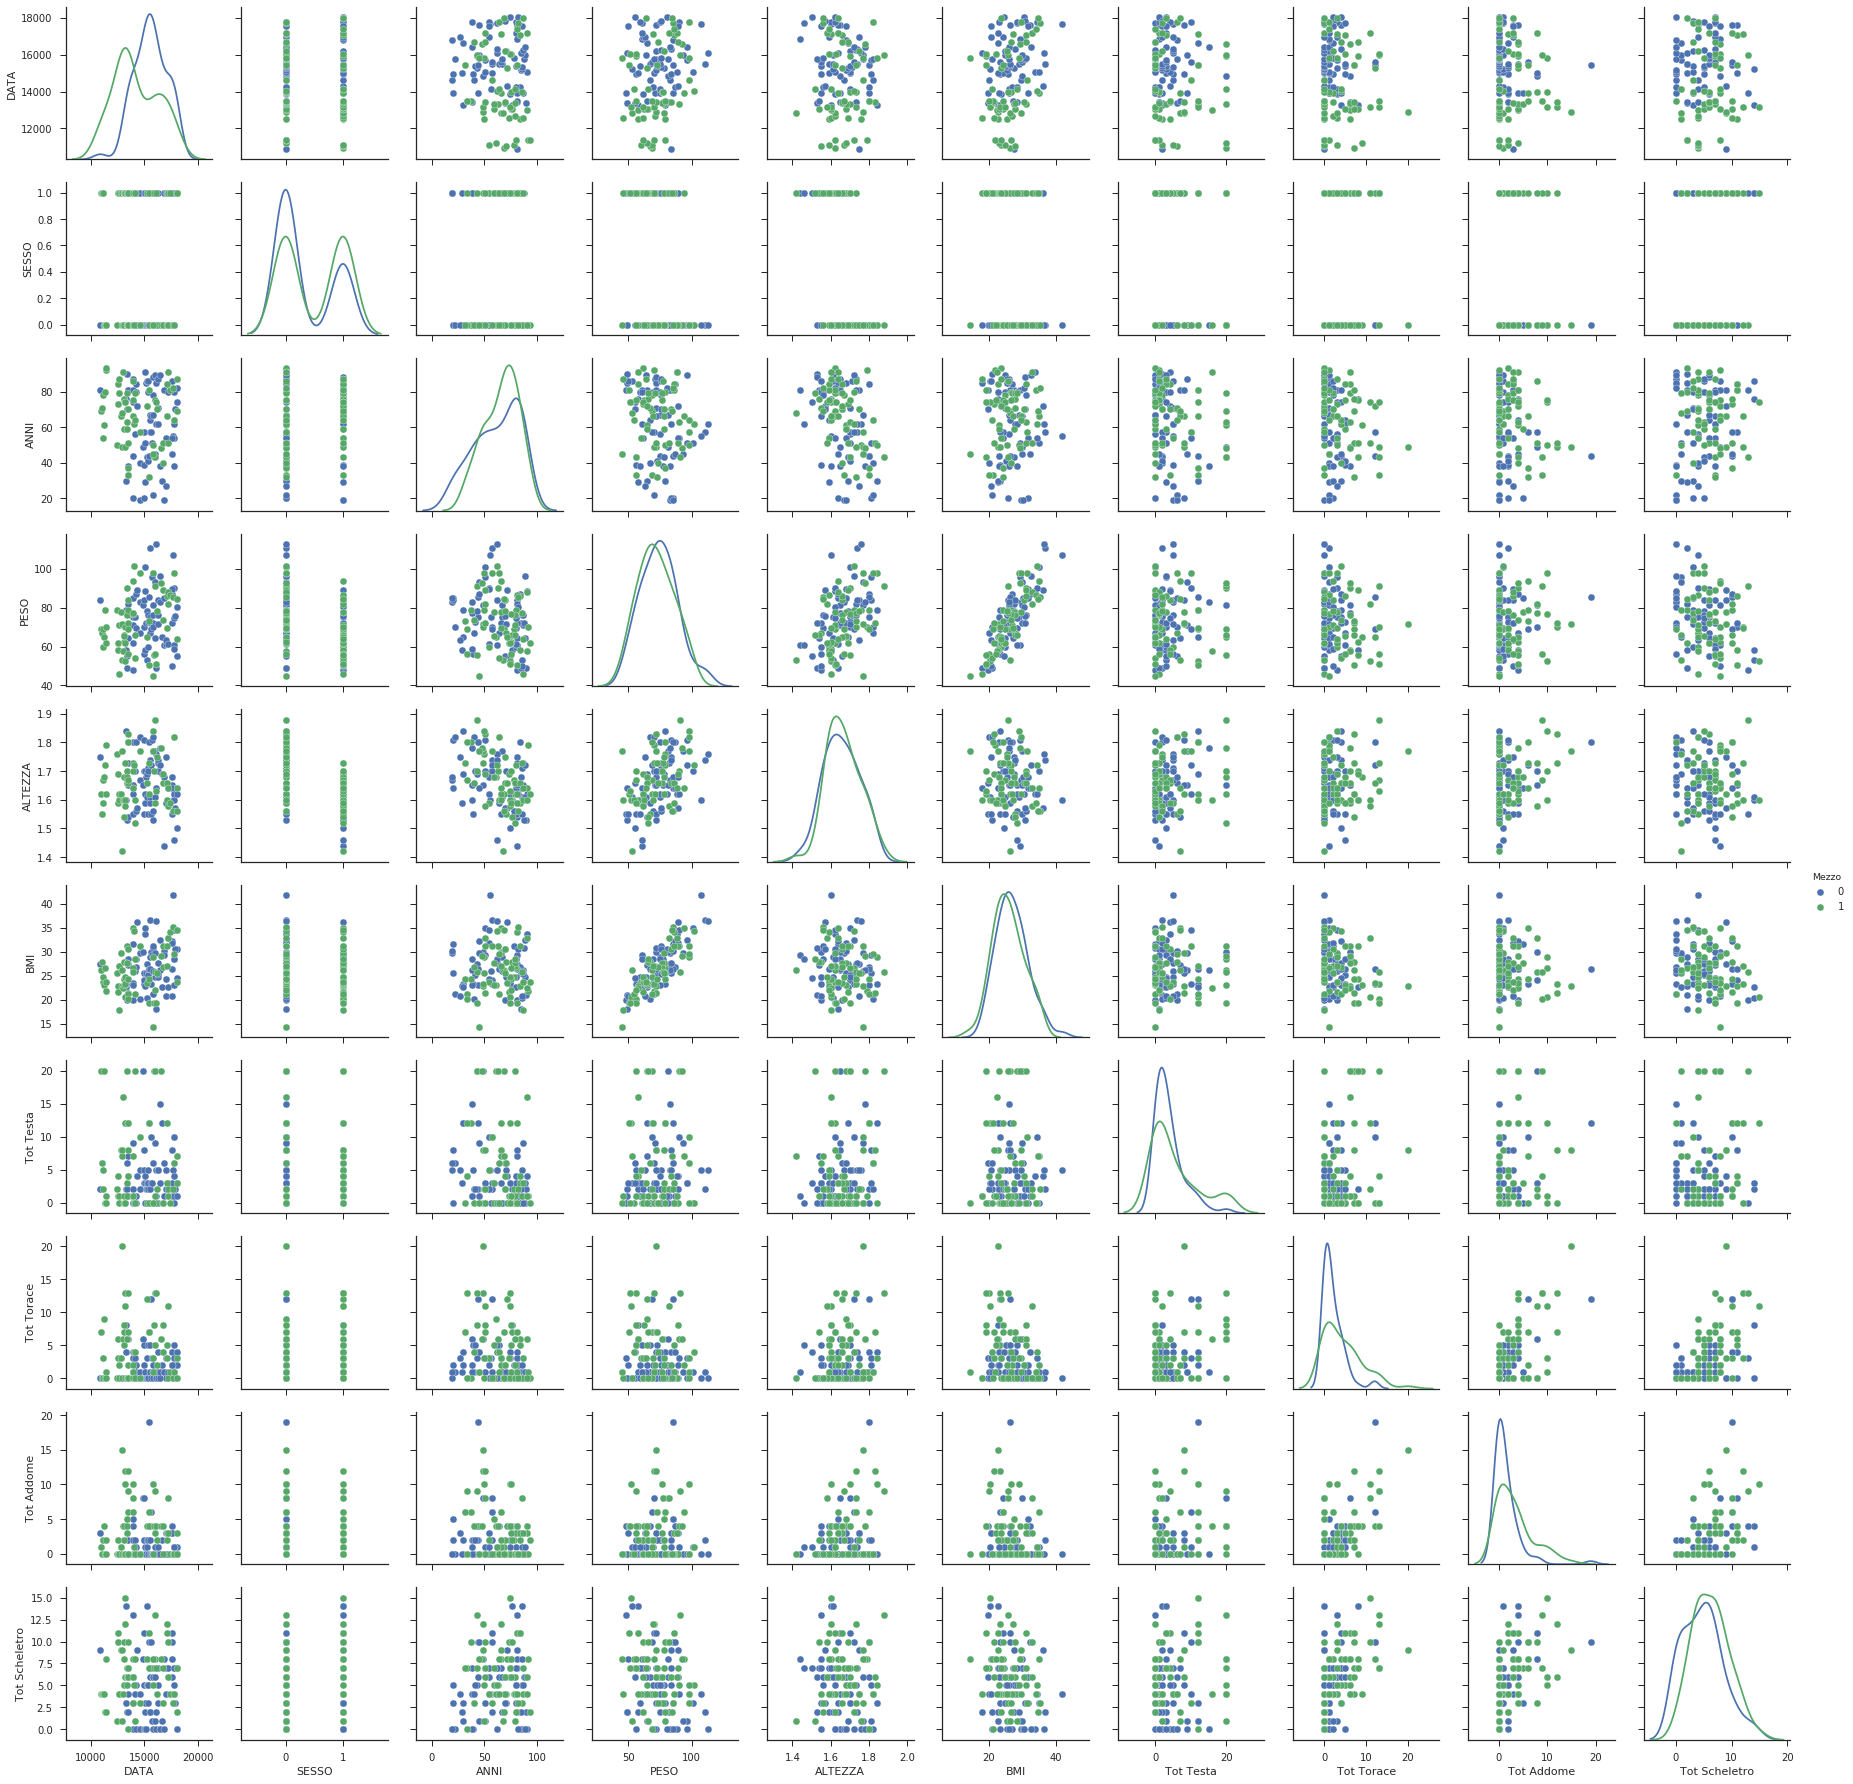

In [3]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
df_pairplot = df[['DATA','SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI', 'Tot Testa', 'Tot Torace', 'Tot Addome', 'Tot Scheletro', 'Mezzo']]
sns.pairplot(df_pairplot, hue='Mezzo', diag_kind="kde",x_vars=df_pairplot.columns[:-1], y_vars=df_pairplot.columns[:-1])
plt.show()

In [4]:
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [5]:
def scatter(x, labels):
    palette = np.array(sns.color_palette("colorblind", 3))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot()
    sc = ax.scatter(x[:,0], x[:,1], c=palette[list(labels)], alpha=0.7)
    
    ax.axis('off')

    txts = []
    for i in range(2):
        # Ogni label viene posta nella mediana dei punti corrispondenti.
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, [0,1][i], fontsize=18)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    
    return f, ax, sc, txts

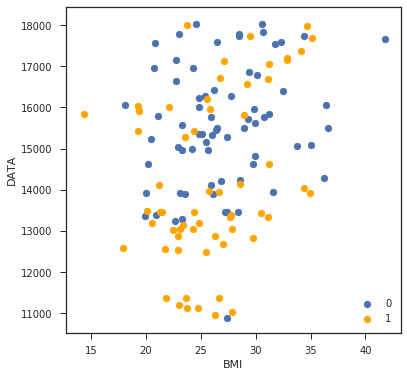

In [36]:
pesanti = df[df['Mezzo'] == 1]
leggeri = df[df['Mezzo'] == 0]

plt.figure(figsize=(6,6))

plt.scatter(leggeri['BMI'], leggeri['DATA'], label='0')
plt.scatter(pesanti['BMI'], pesanti['DATA'], c='orange', label='1')
plt.xlabel('BMI')
plt.ylabel('DATA')
plt.legend(loc='lower right')
plt.show()

In [38]:
df.sort_values('DATA')

,VERBALE,DATA,SESSO,ANNI,PESO,ALTEZZA,BMI,Mezzo,Testa:Neurocranio,Testa:Splancnocranio,...,Scheletro:Rachide-cervicale,Scheletro:Rachide-toracico,Scheletro:Rachide-lombare,Scheletro:Bacino-e-sacro,Scheletro:Complesso-sterno/claveo/costale,Tot Testa,Tot Torace,Tot Addome,Tot Scheletro,Totale
0,85567,10893,0,81,84.0,1.75,27.428571,0,1,0,...,0,3,0,3,3,2,0,3,9,14
1,85829,10970,1,69,69.0,1.62,26.291724,1,4,4,...,0,0,0,0,4,20,7,1,4,32
2,85977,11026,1,71,67.0,1.55,27.887617,1,2,0,...,0,0,0,0,4,6,0,0,4,10
3,86220,11122,1,54,60.0,1.59,23.733238,1,4,0,...,0,0,0,0,4,5,3,2,4,14
4,86247,11130,1,78,69.0,1.67,24.740937,1,2,0,...,0,0,0,0,4,2,0,2,4,8
5,86421,11212,0,61,65.0,1.68,23.030045,1,4,4,...,0,2,0,0,2,20,9,4,4,37
6,86839,11361,0,80,79.0,1.72,26.703624,1,0,0,...,0,0,0,2,0,0,0,0,2,2
7,86876,11374,0,92,70.0,1.79,21.847009,1,0,1,...,0,4,0,0,4,1,1,0,8,10
8,86878,11374,0,93,62.0,1.62,23.624447,1,0,0,...,0,0,0,2,0,0,0,2,2,4
9,90056,12488,0,50,79.0,1.76,25.503616,1,1,0,...,0,0,0,1,0,2,0,0,1,3


In [41]:
df[df['Mezzo'] == 0].count()

VERBALE                                      70
DATA                                         70
SESSO                                        70
ANNI                                         70
PESO                                         70
ALTEZZA                                      70
BMI                                          70
Mezzo                                        70
Testa:Neurocranio                            70
Testa:Splancnocranio                         70
Testa:Telencefalo                            70
Testa:Cervelletto                            70
Testa:Tronco-encefalico                      70
Torace:Polmoni                               70
Torace:Trachea/bronchi                       70
Torace:Cuore                                 70
Torace:Aorta-toracica                        70
Torace:Diaframma                             70
Addome:Fegato                                70
Addome:Milza                                 70
Addome:Aorta-addominale                 